In [ ]:
# https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [ ]:
type(mnist)

module

In [ ]:
#### np.savez로 저장가능함.

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


[5 0 4 1 9 2 1 3 1 4]


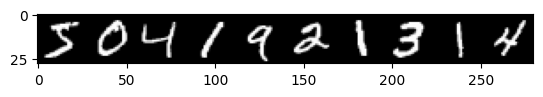

In [ ]:
# 추가코드
import matplotlib.pyplot as plt
import numpy as np
img=np.hstack(x_train[:10])
plt.imshow(img, cmap='gray')
print(y_train[:10])


In [ ]:
# 추가코드
len(y_train), len(y_test), np.unique(y_train, return_counts=True)


(60000,
 10000,
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])))

In [ ]:
# 추가코드  28행, 28열의 흑백이미지 60000장
np.shape(x_train), np.shape(x_test)

((60000, 28, 28), (10000, 28, 28))

In [ ]:
##################
## x,y 데이터 훈련,테스트 로 나누어진 데이터를 array로 받음
## 사진데이터를 로드, 사이즈를 통일, 어레이로 하고, 레이블변환 x
## 지도학습, 사진을 넣으면 0,1,2,3,4,5,6,7,8,9 의 10개중 어떤 카테고리인가를 맞추는
##  다항분류 문제 ,  이 다항문제는 무조건 원핫인코딩되어 있거나
## 아니면 모델에서 원핫인코딩 시켜야 함
## 이 자료에서는 원핫인코딩은   0은 [1,0,0,0,0,0,0,0,0,0]
##                              9는 [0,0,0,0,0,0,0,0,0,1]

In [ ]:
######################
## 샘플
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(3,3)),
        tf.keras.layers.Dense(5, activation='relu'),   # w(100)+b(1) 기본 101개
        tf.keras.layers.Dense(2, activation='softmax')  # softmax는 다항분류 계산식(활성화함수)
])
model.weights



[<tf.Variable 'dense/kernel:0' shape=(9, 5) dtype=float32, numpy=
 array([[-0.08922935, -0.48112512, -0.02169162, -0.28490964, -0.49866337],
        [-0.4340247 ,  0.19585681,  0.564446  ,  0.00149292, -0.22729132],
        [ 0.13019997, -0.4193889 ,  0.20239925,  0.39267004,  0.12171537],
        [-0.21200344,  0.41372848,  0.34201628, -0.21719816, -0.2837145 ],
        [ 0.530686  ,  0.231614  ,  0.36204326, -0.4425711 ,  0.38007832],
        [ 0.46368825,  0.6238247 , -0.58671725,  0.25842726, -0.07268327],
        [-0.49253577,  0.22499508, -0.559165  , -0.08097464, -0.06019133],
        [-0.5424855 ,  0.20695668, -0.30492383,  0.47374105, -0.43835628],
        [ 0.18335283,  0.2617821 ,  0.17148417,  0.09465867,  0.35407364]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(5, 2) dtype=float32, numpy=
 array([[-0.07431918,  0.4547037 ],
        [ 0.6575208 ,  0

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation='relu'),   # w(100)+b(1) 기본 101개
  tf.keras.layers.Dropout(0.2),  # 과적합없애기 w값을 20%정도 0으로 변경
  tf.keras.layers.Dense(10, activation='softmax')  # softmax는 다항분류 계산식(활성화함수)
 ])

# softmax는 categorical_crossentropy 인데
# y입력값이 원핫인코딩 안되어 있으면 sparse_categorical_crossentropy 라고 지정하면
# 알아서 원핫인코딩함
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #
              metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 3)                 303       
                                                                 
Total params: 78803 (307.82 KB)
Trainable params: 78803 (307.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#model.summary()

In [ ]:
hist=model.fit(x_train, y_train, epochs=5,
          validation_data=(x_train,y_train),batch_size=100)

Epoch 1/5
600/600 [==============================] - 5s 7ms/step - loss: 0.4027 - acc: 0.8850 - val_loss: 0.1935 - val_acc: 0.9455
Epoch 2/5
600/600 [==============================] - 3s 5ms/step - loss: 0.1985 - acc: 0.9423 - val_loss: 0.1339 - val_acc: 0.9610
Epoch 3/5
600/600 [==============================] - 3s 5ms/step - loss: 0.1522 - acc: 0.9557 - val_loss: 0.1028 - val_acc: 0.9701
Epoch 4/5
600/600 [==============================] - 3s 5ms/step - loss: 0.1246 - acc: 0.9634 - val_loss: 0.0810 - val_acc: 0.9765
Epoch 5/5
600/600 [==============================] - 3s 4ms/step - loss: 0.1067 - acc: 0.9676 - val_loss: 0.0699 - val_acc: 0.9807


In [ ]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

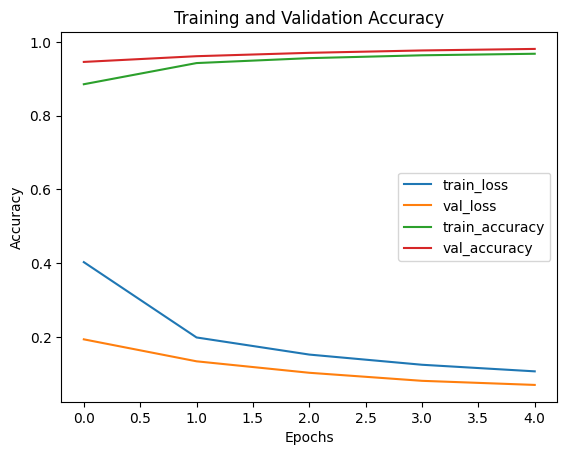

In [ ]:
# 손실 그래프 그리기
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프 그리기
plt.plot(hist.history['acc'], label='train_accuracy')
plt.plot(hist.history['val_acc'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
##########################33
### 테스트 데이터로 모델을 확인
########################
## 기본으로 plt.으로 확인
## 분류평가지표로 확인해야하지만 일단응 생략하고

(30, 28, 28)


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1])

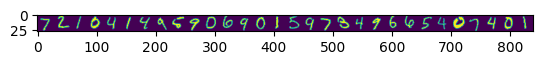

In [ ]:
testData=x_test[:30]
print(np.shape(testData))  # 30,28,28   훈련데이터의 shape과 같음

predictions=model(testData)
result=tf.nn.softmax(predictions)

plt.imshow(np.hstack(x_test[:30]))

print('예측값')
np.argmax(result, axis=1)

In [ ]:
## 코렙에서 드라이브 마운트 안하면 임시폴더에 만들어지기 때문에
## 일정한 시간이 지나면 이 모델 사라짐
## 필요하면 다운로드 받아야함
model.save('최종mnist.h5')


In [ ]:
#########################################3
#### 새파일이라고 생각하고 작업합니다.
######################################
### 손글씨 0~9까지의 카테고리를 분류하는 비전 모델
### 학습시에 28*28의 검정색 배경, 흑백을 학습함.
### 원핫인코딩하지 않고 y값을 학습해서 모델에서 원핫인코딩함

In [ ]:
######### 모델 불러오기
import tensorflow as tf
model=tf.keras.models.load_model('최종mnist.h5')

(28, 28)


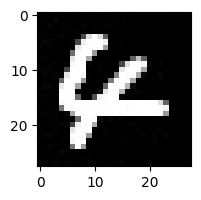

In [ ]:
### 이미지 준비
from PIL import Image
img=Image.open('num4.jpg').resize((28,28)).convert('L')
img=np.array(img);img=255-img; img=img/ 255.0

plt.figure(figsize=(2,2))
print(np.shape(img))  # x_train의 shpae은 6000,28,28
plt.imshow(img,cmap='gray')
plt.show()
newimg=np.reshape(img,(1,28,28))  # 학습할때의 shpae이 6000,28,28  의 3차원 이기때문에

In [ ]:
######## 오류임
model.predict(newimg)   # y값이 원핫인코딩이 되어서 들어간 자료는 이 작업으로 해서 가장 큰 값 위치

1/1 [==============================] - 0s 18ms/step


array([[3.1580287e-04, 1.7704683e-03, 1.8418987e-01, 1.9418588e-02,
        7.6202911e-01, 1.3205570e-03, 1.4479697e-02, 1.3171749e-02,
        1.1146325e-03, 2.1895219e-03]], dtype=float32)

In [ ]:
## y값을 원핫인코딩하지 않고 모델작업에서 loss에서
# loss='sparse_categorical_crossentropy' 하면 tf.nn.sofrmax해야 해야함

predictions=model(newimg)
result=tf.nn.softmax(predictions)
num=np.argmax(result)  #가장큰 위치값 구하기, 숫자값이 최종결과라 여기서 끝이지만,
num

4

In [ ]:
### 만약 레이블이 따로 있다면
class_num=['숫자0','숫자1','숫자2','숫자3','숫자4','숫자5','숫자6','숫자7','숫자8','숫자9']
class_num[num]

'숫자4'